In [3]:
## MobileNet Image classification
## Small size --> great for mobile devices
## VGG: 553 MB on disk
## Mobile net: 18 MB on disk !

## Molti meno parametri: VGG ha 133 M parameters, Mobile Net ~4.2 M parameters.
## Ovviamente non sono "as accurate as VGG", però comunque "se la cavano"

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## GPU bit (vedi notebook 0)

In [4]:
## Download MobileNet
mobile = tf.keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 2s 0us/step


In [9]:
def prepare_image(file):
    ## Prepara l'immagine per MobileNet
    ## R,G, B from 0-224 --> -1,+1
    img_path = "data/MobileNet-samples/"
    img = image.load_img(img_path+file,target_size=(224,224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

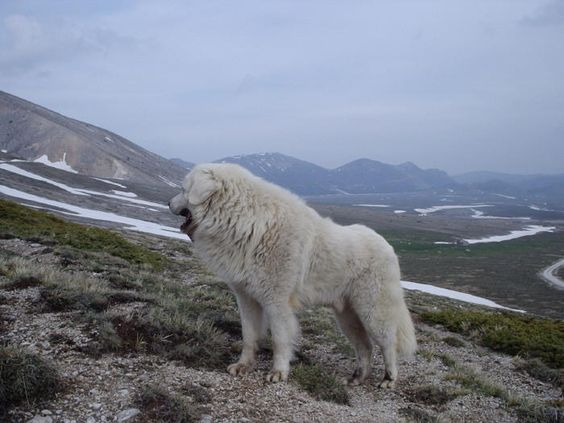

In [10]:
from IPython.display import Image
Image(filename="data/MobileNet-samples/1.jpg", width=300, height=200)

In [12]:
preprocessed_image = prepare_image("1.jpg")
predictions = mobile.predict(preprocessed_image)
## return the top 5 predictions (from the 1000 classes defined)
results = imagenet_utils.decode_predictions(predictions)
results

40960/35363 [==================================] - 0s 1us/step


[[('n02104029', 'kuvasz', 0.838704),
  ('n02111889', 'Samoyed', 0.07242609),
  ('n02114548', 'white_wolf', 0.060901877),
  ('n02111500', 'Great_Pyrenees', 0.013805122),
  ('n02134084', 'ice_bear', 0.00520362)]]